In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [22]:
df = pd.read_csv('/content/drive/MyDrive/Subway/spam.csv', encoding="ISO-8859-1")

In [23]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [24]:
df.shape

(5572, 5)

In [25]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


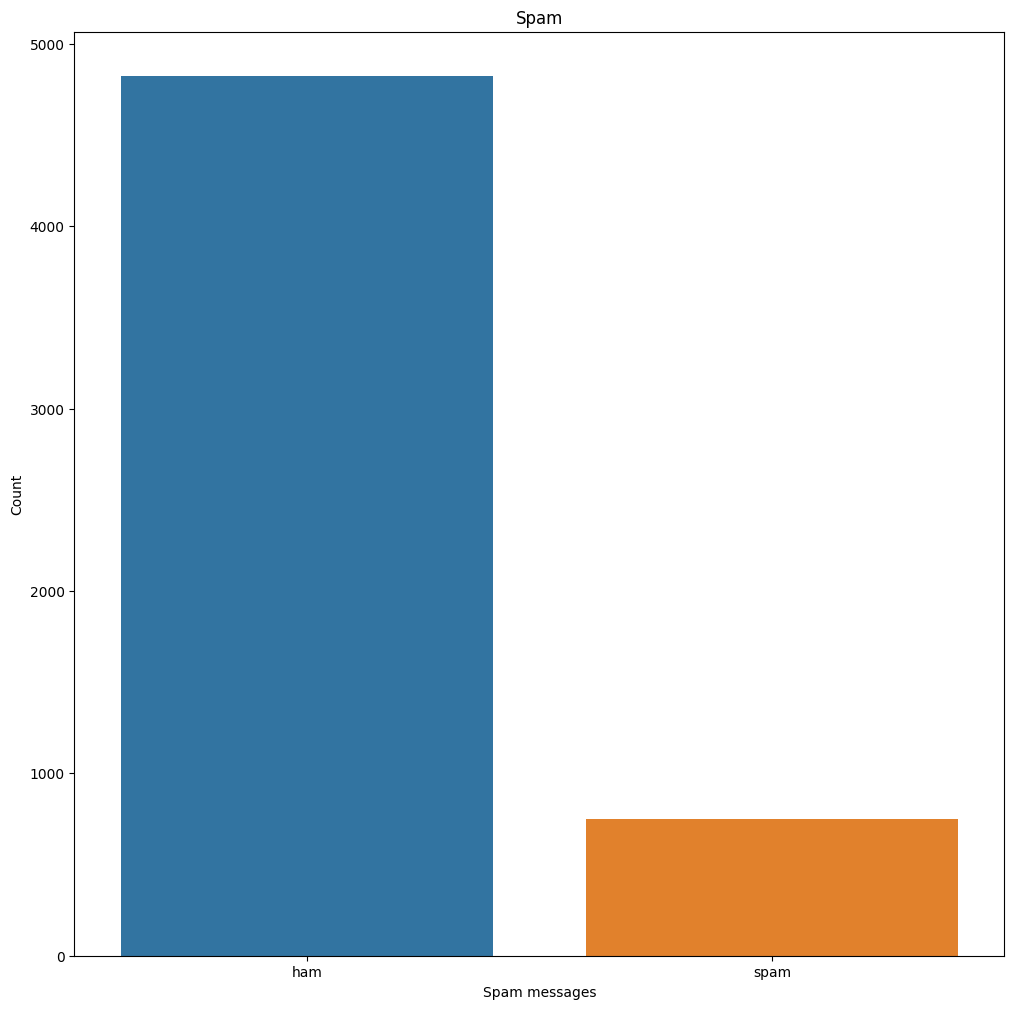

In [26]:
plt.figure(figsize=(12,12))
sns.countplot(x='v1', data=df)
plt.xlabel('Spam messages')
plt.ylabel('Count')
plt.title('Spam')
plt.show()

In [27]:
spams = list(df['v1'].unique())
spams.sort()
spams

['ham', 'spam']

In [28]:
spam_mapper = {'ham': 0, 'spam': 1}
df['v1'] = df['v1'].map(spam_mapper)
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,1,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,0,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,0,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,1,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,1,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [29]:
df.isna().any()

v1            False
v2            False
Unnamed: 2     True
Unnamed: 3     True
Unnamed: 4     True
dtype: bool

In [30]:
df.drop('Unnamed: 2', axis=1, inplace=True)
df.drop('Unnamed: 3', axis=1, inplace=True)
df.drop('Unnamed: 4', axis=1, inplace=True)

In [33]:
df.head(5)

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [34]:
corpus = []
ps = PorterStemmer()

for i in range(0, df.shape[0]):
    dialog = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df['v2'][i]) # Cleaning special character from the dialog/script
    dialog = dialog.lower() # Converting the entire dialog/script into lower case
    words = dialog.split() # Tokenizing the dialog/script by words
    dialog_words = [word for word in words if word not in set(stopwords.words('english'))] # Removing the stop words
    words = [ps.stem(word) for word in dialog_words] # Stemming the words
    dialog = ' '.join(words) # Joining the stemmed words
    corpus.append(dialog) # Creating a corpus

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=10000, ngram_range=(1,2))
X = cv.fit_transform(corpus).toarray()

In [36]:
y = df['v1'].values

In [37]:
# @title Default title text
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (4457, 10000), X_test size: (1115, 10000)


In [38]:

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [39]:
nb_y_pred = nb_classifier.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score
score1 = accuracy_score(y_test, nb_y_pred)
print("---- Score ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))

---- Score ----
Accuracy score is: 98.65%


In [41]:
def spam_prediction(sample_script):
    sample_script = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_script)
    sample_script = sample_script.lower()
    sample_script_words = sample_script.split()
    sample_script_words = [word for word in sample_script_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_script = [ps.stem(word) for word in sample_script_words]
    final_script = ' '.join(final_script)
    temp = cv.transform([final_script]).toarray()
    return nb_classifier.predict(temp)[0]

In [43]:
test = pd.read_csv('/content/drive/My Drive/Subway/spam.csv', encoding="ISO-8859-1")
test.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [45]:
test.drop('Unnamed: 2', axis=1, inplace=True)
test.drop('Unnamed: 3', axis=1, inplace=True)
test.drop('Unnamed: 4', axis=1, inplace=True)

In [47]:
from random import randint
row = randint(0,test.shape[0]-1)
sample_script = test.v2[row]

print('Script: {}'.format(sample_script))
value = spam_prediction(sample_script)
print('Prediction: {}'.format(list(spam_mapper.keys())[value]))

Script: Congratulations! Thanks to a good friend U have WON the å£2,000 Xmas prize. 2 claim is easy, just call 08718726978 NOW! Only 10p per minute. BT-national-rate
Prediction: spam


In [49]:
lr_classifier = LogisticRegression(max_iter=1000)

# Fit the Logistic Regression model
lr_classifier.fit(X_train, y_train)

# Make predictions on the test set
lr_y_pred = lr_classifier.predict(X_test)

# Calculate accuracy score
score2 = accuracy_score(y_test, lr_y_pred)
print("---- Score ----")
print("Accuracy score for Logistic Regression is: {}%".format(round(score2 * 100, 2)))

def spam_prediction_lr(sample_script):
    sample_script = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sample_script)
    sample_script = sample_script.lower()
    sample_script_words = sample_script.split()
    sample_script_words = [word for word in sample_script_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_script = [ps.stem(word) for word in sample_script_words]
    final_script = ' '.join(final_script)
    temp = cv.transform([final_script]).toarray()
    return lr_classifier.predict(temp)[0]

test = df

from random import randint
row = randint(0, test.shape[0] - 1)
sample_script = test.v2[row]

print('Script: {}'.format(sample_script))
value = spam_prediction_lr(sample_script)
print('Prediction: {}'.format(list(spam_mapper.keys())[value]))

---- Score ----
Accuracy score for Logistic Regression is: 97.94%
Script: G wants to know where the fuck you are
Prediction: ham


In [50]:
svm_classifier = SVC(kernel='linear', C=1.0)

# Fit the SVM model
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
svm_y_pred = svm_classifier.predict(X_test)

# Calculate accuracy score
score3 = accuracy_score(y_test, svm_y_pred)
print("---- Score ----")
print("Accuracy score for Support Vector Machine is: {}%".format(round(score3 * 100, 2)))

def spam_prediction_svm(sample_script):
    sample_script = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sample_script)
    sample_script = sample_script.lower()
    sample_script_words = sample_script.split()
    sample_script_words = [word for word in sample_script_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_script = [ps.stem(word) for word in sample_script_words]
    final_script = ' '.join(final_script)
    temp = cv.transform([final_script]).toarray()
    return svm_classifier.predict(temp)[0]

test = df

from random import randint
row = randint(0, test.shape[0] - 1)
sample_script = test.v2[row]

print('Script: {}'.format(sample_script))
value = spam_prediction_svm(sample_script)
print('Prediction: {}'.format(list(spam_mapper.keys())[value]))

---- Score ----
Accuracy score for Support Vector Machine is: 98.3%
Script: Thanks for your ringtone order, ref number K718. Your mobile will be charged å£4.50. Should your tone not arrive please call customer services on 09065069120
Prediction: spam
